<a href="https://colab.research.google.com/github/DinalieLiyanage/Voice-recognition/blob/master/audio_splitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!git init

Initialized empty Git repository in /content/.git/


In [54]:
!git remote add origin https://github.com/DinalieLiyanage/Voice-recognition.git

In [56]:
!git config --global user.email 'bhagyafdo97@gmail.com'
!git config --global user.name 'DinalieLiyanage'

In [57]:
!git fetch

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!pip install tensorflow-io

In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

audio = tfio.audio.AudioIOTensor('/content/lunch-1.wav')

print(audio)

<AudioIOTensor: shape=[51713     2], dtype=<dtype: 'int16'>, rate=44100>


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

# Load your audio.
song = AudioSegment.from_mp3('/content/lunch-1.mp3')

print(song)

In [ ]:
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 200,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -25
)
print(len(chunks))

3


In [ ]:
import tensorflow as tf
import tensorflow_io as tfio
print("processingggg")
# Process each chunk with your parameters
for i, chunk in enumerate(chunks):
    print('insideee')
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)
    print(normalized_chunk)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.mp3.".format(i))
    # file = normalized_chunk.export(
    #     ".//chunk{0}.mp3".format(i),
    #     bitrate = "192k",
    #     format = "mp3"
    # )


    

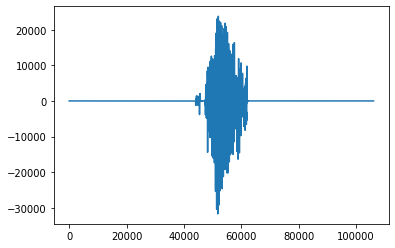

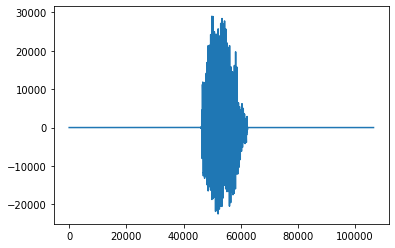

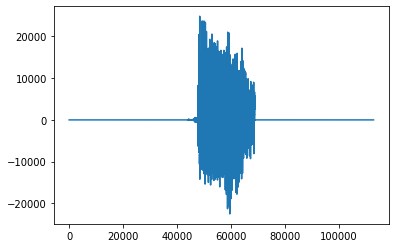

In [62]:
from pydub import AudioSegment
import tensorflow as tf
import matplotlib.pyplot as plt

dataset = tf.data.Dataset.list_files('data/*')

def decode_mp3(mp3_path):
    mp3_path = mp3_path.numpy().decode("utf-8")
    mp3_audio = AudioSegment.from_file(mp3_path, format="mp3")
    return mp3_audio.get_array_of_samples()

dataset = dataset.map(lambda path:
    tf.py_function(func=decode_mp3, inp=[path], Tout=tf.float32))

for features in dataset.take(3):
    data = features.numpy()
    plt.plot(data)
    plt.show()
